## Logistic Regression
* Real world problems often require more sophisticated non-linear models.
    * Non-linear like quadratic, exponential, logistic
* A logistic regression implies that the possible outcomes are not numerical but rather categorical.
    * With linear regression we could predict the price a customer would pay if he buys.
    * With logistic regression we could predict that will the customer buy at all.

## Logistic Regression with python
* Students won't even have a GPA if they don't get admitted.
    * So we'll make a model to predict whether a student will be admitted or not.

In [239]:
# importing relevant libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [240]:
raw_data = pd.read_csv('2.3 2.01. Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [241]:
# mapping categorical data
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


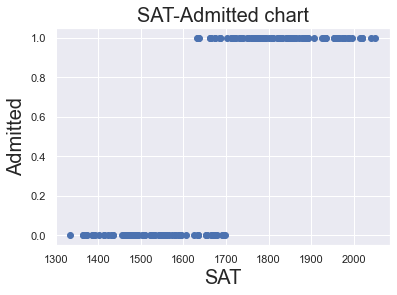

In [242]:
# defining variales and creating a plot
y = data['Admitted']
x1 = data['SAT']
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.title('SAT-Admitted chart', fontsize=20)
plt.scatter(x1, y)

* Creating a linear regression model

Text(0.5, 1.0, 'SAT-Admitted chart with linear regression line')

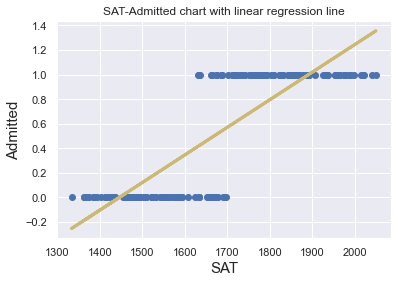

In [243]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y, x)
result_lin = reg_lin.fit()

plt.scatter(x1, y)
y_hat = x1 * result_lin.params[1] + result_lin.params[0]

plt.plot(x1, y_hat, lw=3, color='C8')
plt.xlabel('SAT', fontsize=15)
plt.ylabel('Admitted', fontsize=15)
plt.title('SAT-Admitted chart with linear regression line')

## Logistic Regression Assumptions
* 1. Non-linearity
* Logistic model
    * $p(x) = \frac{e^(b_{0}+b_{1}*x_{1}+...+b_{k}*x_{k})}{(1+e^(b_{0}+b_{1}*x_{1}+...+b_{k}*x_{k}))}$
* Logit model
    * $log(odds)_{adj.} = b_{0}+b_{1}*x_{1}+...+b_{k}*x_{k}$
        * $odds_{adj.} = \frac{P(x)}{(1-P(x))} $

* Creating a logistic regression model

In [244]:
reg_log = sm.Logit(y, x)
result_log = reg_log.fit()
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Feb 2022   Pseudo R-squ.:                  0.7992
Time:                        23:23:06   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Regression summary
* MLE stands for maximum likelihood of estimation.
* Log_likelihood is the best metric for logistic regression models.
    * It's almost but not always negative.
    * The more negative it gets the better the model is.
* LL-Null stands for log likelihood null. It's the log-likelihood of the model which has no independent variables.
* LLR (log likelihood ratio) measures if our model is statistically different from LL-Null (a useless model)
    * It's like F-statistics in linear regression model.
* Pseudo R-squ (McFadden's R squared): It's ideally between 0.2 and 0.4
    * This model is useful for comparing the variations of the same model.
    * Different models will have completely different and incomparable Pseudo R-squares!!!

## What do the odds actually mean?
* $delta(odds) = e^(b{_k})$

## Binary predictors in a logistic regression
* In the same way we created dummies for a linear regression we can use binary predictors and a logistic regression.

In [245]:
raw_data = pd.read_csv('10.1 2.02. Binary predictors.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [246]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data.describe()

,SAT,Admitted,Gender
count,168.000000,168.000000,168.000000
mean,1695.273810,0.559524,0.464286
std,183.019017,0.497928,0.500214
min,1334.000000,0.000000,0.000000
25%,1547.500000,0.000000,0.000000
50%,1691.500000,1.000000,0.000000
75%,1844.500000,1.000000,1.000000
max,2050.000000,1.000000,1.000000


In [247]:
# defining dependant and independent variables
y = data['Admitted']
x1 = data['Gender']

In [248]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
result_log = reg_log.fit()
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Feb 2022   Pseudo R-squ.:                  0.1659
Time:                        23:23:07   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

In [249]:
x1 = data[['SAT', 'Gender']]
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
result_reg = reg_log.fit()
result_reg.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Feb 2022   Pseudo R-squ.:                  0.8249
Time:                        23:23:07   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [250]:
import numpy as np
np.exp(1.9449)

6.992932526814459

* This result means that for the same SAT score it's a female has 7 times higher odds to get admitted.

In [251]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
result_reg.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [252]:
result_reg.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

* Confusion matrix shows how confused our model is.
    * The most important metric we can calculate from this matrix is 'accuracy'.
    * $MisclassificationRate = 1 - accuracy$

In [253]:
confusion_matrix = pd.DataFrame(result_reg.pred_table())
confusion_matrix.columns = ['Predicted 0', 'Predicted 1']
confusion_matrix = confusion_matrix.rename(index={0: 'Actual 0', 1:'Actual 1'})
confusion_matrix

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [254]:
# calculating the accuracy of logistic regression model
cm = np.array(confusion_matrix)
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
accuracy

0.9464285714285714

## Testing the model

In [255]:
# we splitted our data already
data_test = pd.read_csv('15.2 2.03. Test dataset.csv')
data_test.head()

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male


In [256]:
data_test['Admitted'] = data_test['Admitted'].map({'Yes': 1, 'No': 0})
data_test['Gender'] = data_test['Gender'].map({'Female': 1, 'Male': 0})
data_test.head()

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0


In [257]:
x

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


In [263]:
test_actual = data_test['Admitted']
test = data_test.drop(['Admitted'], axis=1)
test = sm.add_constant(test)
result_log = sm.Logit(test_actual, test).fit()

Optimization terminated successfully.
         Current function value: 0.126762
         Iterations 11


In [264]:
def confusion_matrix(data,actual_values,model):
        pred_values = model.predict(data)
        bins=np.array([0,0.5,1])
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        return cm, accuracy

In [266]:
cm = confusion_matrix(test, test_actual, result_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

* Almost always the training accuracy is higher than the test accuracy. (because of over fitting)